In [70]:
dir = 'D:/projects/datascience/bfu-ml-labs/lab_1.2'

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [72]:
df = datasets.load_diabetes(as_frame=True).frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [73]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=123)
train.shape, test.shape

((353, 11), (89, 11))

In [90]:
import seaborn as sns

sns.pairplot(df)

По графикам можно сделать вывод, что сильнее всего на значение целевой переменной `target` (численной оценки степени развития диабета) влияет столбец `s5` (*"ltg, possibly log of serum triglycerides level"*, если верить документации `sklearn`).

Тогда возьмём `X = s5, y = target`.

In [75]:
X_train, X_test = train[['s5']], test[['s5']]
y_train, y_test = train['target'], test['target']

# Линейная регрессия. Используем sklearn.

In [76]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
model.coef_, model.intercept_

(array([866.13662601]), 152.59585493910072)

In [77]:
y_test_pred = model.predict(X_test)
y_test_pred

array([185.84965341, 152.83099867, 208.31289365, 130.1175096 ,
       175.73405191, 225.78031359, 176.86197737, 173.42867822,
        69.07150863, 136.90296002, 139.64150412, 177.97401603,
       166.71817174, 179.61324666, 264.34429279, 183.82509532,
       125.96110578, 136.90296002, 209.80262538, 187.8235922 ,
       164.78452148, 181.74725331, 144.84911254, 106.72630445,
       157.97397062, 181.21913469, 110.70799379,  96.5715201 ,
       155.07627147, 222.39387704,  91.7849977 , 213.40843186,
       211.26476789, 200.41096037, 199.99431856,  98.10464477,
       128.06665561, 115.72259562, 192.09238528, 123.79786253,
       202.86566915, 103.95572405, 116.92801505, 144.00468268,
       125.96110578, 181.74725331, 109.40294855, 101.08437346,
       132.11643762, 200.82541507, 111.99181784, 125.96110578,
       110.70799379, 185.34836004, 153.58653974, 226.67922394,
       152.06815757, 166.07886915, 172.8416611 , 151.29787401,
       116.92801505, 129.09874141, 155.81072737, 136.90

### Посмотрим на метрики (ЛР 1.3)

In [78]:
def mean_absolute_percentage_error(y, y_pred):
    return 100 * (np.abs(y - y_pred) / y).mean()

In [79]:
mean_absolute_percentage_error(y_test, y_test_pred)

47.46361461276875

In [94]:
import sklearn.metrics as mtr

In [98]:
mtr.mean_absolute_error(y_test, y_test_pred)

50.102809333767624

In [96]:
mtr.r2_score(y_test, y_test_pred)

0.40729576150005564

In [99]:
mtr.mean_absolute_percentage_error(y_test, y_test_pred)

0.4746361461276875

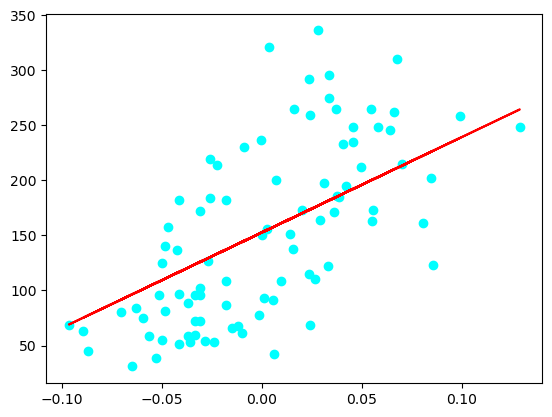

In [89]:
plt.scatter(X_test, y_test, color='cyan')
plt.plot(X_test, y_test_pred, color='red')
plt.show()

# Линейная регрессия. Используем свою реализацию.

In [81]:
# Конвертируем pd.DataFrame в pd.Series
X_train_squeezed = X_train.squeeze()
X_test_squeezed = X_test.squeeze()

In [82]:
X_mean = X_train_squeezed.mean()
y_mean = y_train.mean()
X_dev = X_train_squeezed - X_mean
y_dev = y_train - y_mean
slope = np.sum(X_dev * y_dev) / np.sum(X_dev ** 2)
y_intercept = y_mean - slope * X_mean
slope, y_intercept

(866.1366260051841, 152.59585493910072)

In [83]:
abs(slope - model.coef_), abs(y_intercept - model.intercept_)

(array([2.27373675e-13]), 0.0)

In [84]:
y_test_pred_my = slope * X_test_squeezed + y_intercept
np.max(np.abs(y_test_pred_my - y_test_pred))

5.684341886080802e-14

Коэффициенты линейной регрессии у меня и в `sklearn` получились одинаковые.

Соответственно, одинаковыми получатся и таблицы ответов (предсказаний), графики, и метрики.

In [87]:
y_test_pred_my

13     185.849653
66     152.830999
234    208.312894
24     130.117510
388    175.734052
          ...    
114    238.551449
142    192.092385
121    169.839267
31     120.437635
385    130.117510
Name: s5, Length: 89, dtype: float64

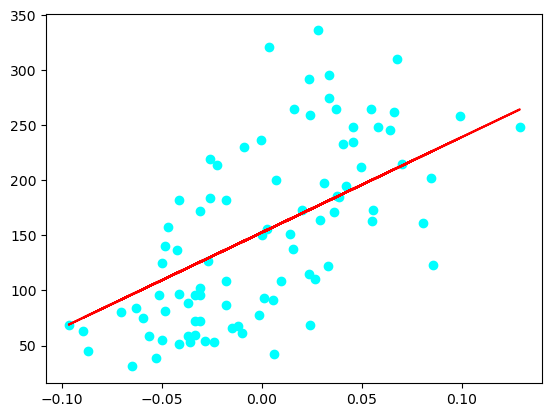

In [88]:
plt.scatter(X_test_squeezed, y_test, color='cyan')
plt.plot(X_test_squeezed, y_test_pred_my, color='red')
plt.show()